# 2 - 15 vs 50 Year Module: 100% RE by 2050

Comparison case using the functions in CE-MFC to compare 15 year module reliability vs 50 year module reliability.





![Folder 15 vs 50 year Module](../images_wiki/2_15vs50Overview.PNG)

This scenario is a though experiment comparing a 15-year 95% recyclable module versus a 50-year module 30% recyclable module.
This is done to understand potential tradeoffs in PV technology evolution - is it better to create
a completely recyclable PV panel, or to extend the module lifetime.
This scenario assumes that the 15-year module is 95% recyclable into high quality material, i.e. it will be used to create new modules.

95% recyclability is represented by a 100% collection rate and a 95% efficient recycling process.

The 50-year module uses the previous settings.

Plot the annual waste glass sent to the landfill for this scenario. 
Here, because the 15-module is 100% collected and only 5% is landfilled during the recycling process
the landfilled glass is very low regardless of capacity assumptions.
Thus, if the intent is to avoid landfilled material, a 95% recyclable module is the best technology evolution.


In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'Cole2021')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_ICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


In [2]:
import PV_ICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [4]:
print(os.getcwd())
moduleFile = r'..\..\baselines\baseline_modules_US_57RE2050.csv'
moduleFile_high = r'..\..\baselines\baseline_modules_US_100RE2050.csv'

MATERIALS = ['glass','aluminium_frames','silver','silicon', 'copper', 'encapsulant']
MATERIAL = MATERIALS[0]

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\tutorials


In [5]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)

r1.createScenario(name='50_Year_Module', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['50_Year_Module'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r1.createScenario(name='15_Year_Module', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['15_Year_Module'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r1.createScenario(name='base', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['base'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    
#high installs
r1.createScenario(name='50_Year_Module_high', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['50_Year_Module_high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r1.createScenario(name='15_Year_Module_high', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['15_Year_Module_high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r1.createScenario(name='base_high', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['base_high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


In [6]:
#r1.scenario['50_Year_Module'].data.keys()
r1.scenario['base_high'].material.keys()

dict_keys(['glass', 'aluminium_frames', 'silver', 'silicon', 'copper', 'encapsulant'])

## Change Reliability Values

In [7]:
########base deployment scenario#########
r1.scenario['50_Year_Module'].data['mod_reliability_t50'] = 60
r1.scenario['50_Year_Module'].data['mod_reliability_t90'] = 70
r1.scenario['50_Year_Module'].data['mod_lifetime'] = 50
r1.scenario['15_Year_Module'].data['mod_degradation'] = 0.4

r1.scenario['15_Year_Module'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module'].data['mod_degradation'] = 1.4

######high scenario##########
r1.scenario['50_Year_Module_high'].data['mod_reliability_t50'] = 60
r1.scenario['50_Year_Module_high'].data['mod_reliability_t90'] = 70
r1.scenario['50_Year_Module_high'].data['mod_lifetime'] = 50
r1.scenario['15_Year_Module_high'].data['mod_degradation'] = 0.4

r1.scenario['15_Year_Module_high'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module_high'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module_high'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module_high'].data['mod_degradation'] = 1.4

## Change Recyclability Values

In [8]:
#list of recycling variables
RecyclingPaths = ['mat_MFG_scrap_recycled', 'mat_MFG_scrap_Recycled_into_HQ', 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_EOL_collected_Recycled', 'mat_EOL_Recycled_into_HQ', 'mat_EoL_Recycled_HQ_into_MFG']
RecyclingYields = ['mat_MFG_scrap_recycling_eff', 'mat_EOL_Recycling_eff']

In [9]:
#15 Year Module Value setting
r1.scenario['15_Year_Module'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['15_Year_Module'].data['mod_EOL_collection_eff'] = 100.0

for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['15_Year_Module'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['15_Year_Module'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0

#50 year module value setting
r1.scenario['50_Year_Module'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['50_Year_Module'].data['mod_EOL_collection_eff'] = 100.0

for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['50_Year_Module'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['50_Year_Module'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 30.0
        
#print(r1.scenario['50_Year_Module'].material['encapsulant'].materialdata['mat_EOL_Recycling_eff'])
#high scenario################
#15 Year Module Value setting
r1.scenario['15_Year_Module_high'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['15_Year_Module_high'].data['mod_EOL_collection_eff'] = 100.0

for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['15_Year_Module_high'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['15_Year_Module_high'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0

#50 year module value setting
r1.scenario['50_Year_Module_high'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['50_Year_Module_high'].data['mod_EOL_collection_eff'] = 100.0

for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['50_Year_Module_high'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['50_Year_Module_high'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 30.0

## Turn IRENA lifetime values on or off & run PV ICE simulation

In [10]:
IRENA= False
ELorRL = 'RL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta': 30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta': 30}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
*****

In [11]:
r1.scenario['base'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG',
       'mat_modules_Collected', 'mat_modules_NotCollected',
       'mat_modules_Recycled', 'mat_modules_NotRecycled',
       'mat_EOL_sento_Recycling', 'mat_EOL_NotRecycled_Landfilled',
       'mat_EOL_Recycled', 'mat_EOL_Recycled_Losses_Landfilled',
       'mat_EOL_Recycled_2_HQ', 'mat_EOL_Recycled_2_OQ',
       'mat_EoL_Recycled_HQ_into_MFG', 'mat_EOL_Recycled_HQ_into_OU',
       'mat_UsedSuccessfullyinModuleManufacturing',
       'mat_EnteringModuleManufacturing', 'mat_LostinModuleManufacturing',
       'mat_Manufacturing_Input', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Sentto_Recycling', 'mat_MFG_Scrap_Landfilled',
       'mat_MFG_Scrap_R

In [12]:
r1.scenario['base'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled', 'mod_Repair',
       'mod_MerchantTail', 'mod_Reuse', 'irradiance_stc', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Repaired_[W]', 'Repaired_Area',
       'Cumulative_Active_Area', 'Installed_Capacity_[W]', 'WeibullParams',
       'EOL_on_Year_0', 'EOL_on_Year_1', 'EOL_on_Year_2', 'EOL_on_Year_3',
       'EOL_on_Year_4', 'EOL_on_Year_5', 'EOL_on_Year_6', 'EOL_on_Year_7',
       'EOL_on_Year_8', 'EOL_on_Year_9', 'EOL_on_Year_10', 'EOL_on_Year_11',
       'EOL_on_Year_12', 'EOL_on_Year_13', 'EOL_on_Year_14', 'EOL_on_Year_15',
       'EOL_on_Year_16', 'EOL_on_Year_17', 'EOL_on_Year_18', 'EOL_on_Year_19',
       'EOL_on_Year_20', 'EOL_on_Year_21', 'EOL_on_Year_22', 'EOL_on_Y

Modules installed between 2010 and 2020 become decommissioned on ~2035-2045, that is why the baseline has 'jaggedy' lines that follow the installs on those years.
This jaggedy lines are not seen in the 15_Year_Module example, because 90% of it is going into recycling. You can still see a bit of effect on 2025-2035.
For base, after 2045, and for 15_years, after 2035 become nice curves because the installs follow a CAGR projection.
IF more years where plotted for the 50_year_module, we would see the same jaggediness around 2065-2075


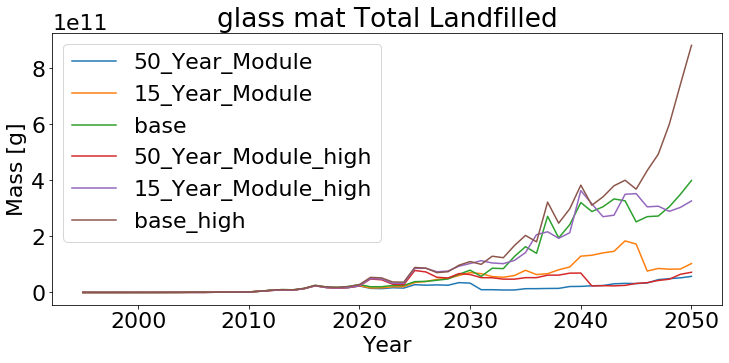

In [13]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
print("Modules installed between 2010 and 2020 become decommissioned on ~2035-2045, that is why the baseline has 'jaggedy' lines that follow the installs on those years.")
print("This jaggedy lines are not seen in the 15_Year_Module example, because 90% of it is going into recycling. You can still see a bit of effect on 2025-2035.")
print("For base, after 2045, and for 15_years, after 2035 become nice curves because the installs follow a CAGR projection.")
print("IF more years where plotted for the 50_year_module, we would see the same jaggediness around 2065-2075")


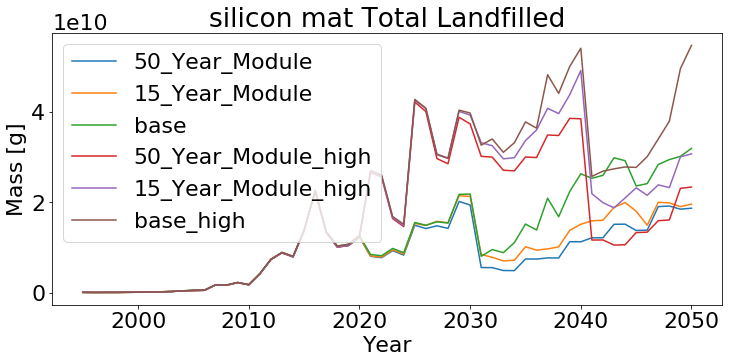

In [14]:
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

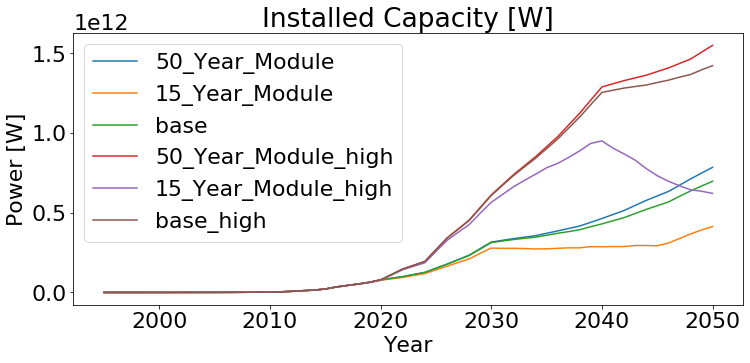

In [15]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

### Modifying Installed Capacity requirements to match 30 Year Module

In [16]:
#create the scenario
r1.createScenario(name='15_Year_Module_IncreasedInstalls', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['15_Year_Module_IncreasedInstalls'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

#define lifetime properties
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_degradation'] = 1.4

#define closed loop high recycling
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#modify all materials
for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['15_Year_Module_IncreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['15_Year_Module_IncreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0

#####high scenario#########
r1.createScenario(name='15_Year_Module_high_IncreasedInstalls', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['15_Year_Module_high_IncreasedInstalls'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

#define lifetime properties
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_degradation'] = 1.4

#define closed loop high recycling
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#modify all materials
for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['15_Year_Module_high_IncreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['15_Year_Module_high_IncreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0

In [17]:
r1.calculateMassFlow()

Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
*****

### Modifing the installed capacity requiremetns according to t50. 

Needs to run each year becuase it needs to calculate the acumulated installs and deads.


In [18]:
#compensate for short lifetime by adding more installs, currently set to meet 30 year installs
Under_Installment = []
for i in range (0, len(r1.scenario['base'].data)):
    Under_Installment = ( (r1.scenario['base'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['15_Year_Module_IncreasedInstalls'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] += Under_Installment
    r1.calculateMassFlow()


Working on Scenario:  50_Year_Module
********************


C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculation

==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==>

==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encap

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
F

==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_fra

==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculation

==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==>

Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Mo

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
F

==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_fra

==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculation

==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_

==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silic

==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Mate

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
*****************

==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on

In [19]:
##########high scenario############
#compensate for short lifetime by adding more installs, currently set to meet 30 year installs
Under_Installment = []
for i in range (0, len(r1.scenario['base_high'].data)):
    Under_Installment = ( (r1.scenario['base_high'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] += Under_Installment
    r1.calculateMassFlow()

C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
*****

==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_

==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silic

==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Mate

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
*****************

==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on

==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working o

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calcul

==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silve

==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Mate

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
*****************

==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on

==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working 

Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high


==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  alumi

==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Mate

Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
W

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_high_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+

### And create a 50 year decreased installs by the same principle

In [20]:
r1.createScenario(name='50_Year_Module_DecreasedInstalls', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['50_Year_Module_DecreasedInstalls'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_reliability_t50'] = 60
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_reliability_t90'] = 70
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_lifetime'] = 50
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_degradation'] = 0.4

r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 30
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 30 
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100 #95% of the above 2 gets turned into new panels  
    
r1.calculateMassFlow()


FileNotFoundError: [Errno 2] No such file or directory: '..\\baselines\\baseline_modules_US.csv'

In [ ]:
Over_Installment = []
for i in range (0, len(r1.scenario['base'].data)):
    Over_Installment = ( (r1.scenario['50_Year_Module_DecreasedInstalls'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['base'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['50_Year_Module_DecreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] -= Over_Installment
    r1.calculateMassFlow()


## PLots

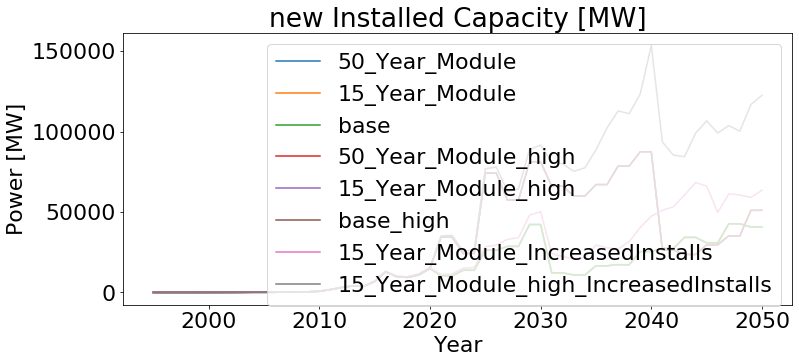

In [21]:
r1.plotScenariosComparison(keyword='new_Installed_Capacity_[MW]')


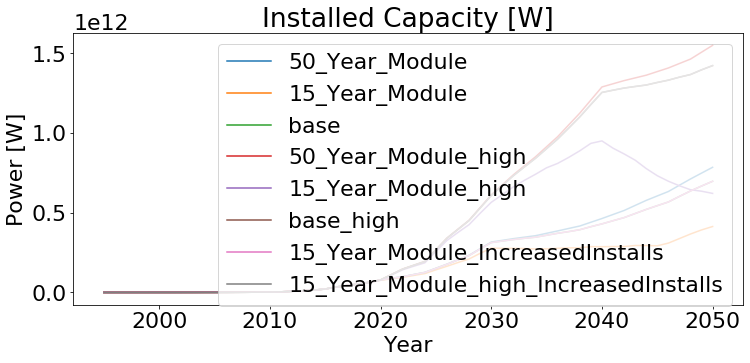

In [22]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

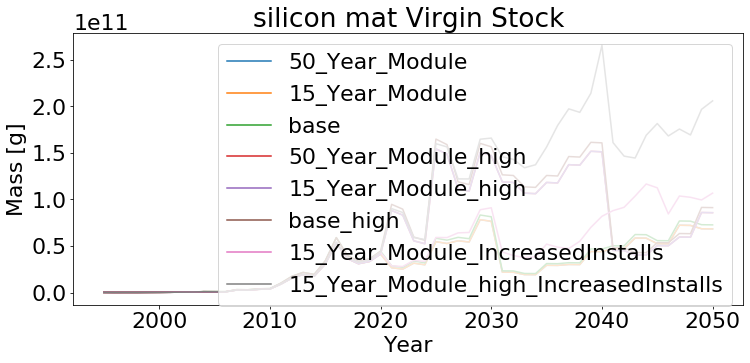

In [23]:
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Virgin_Stock')


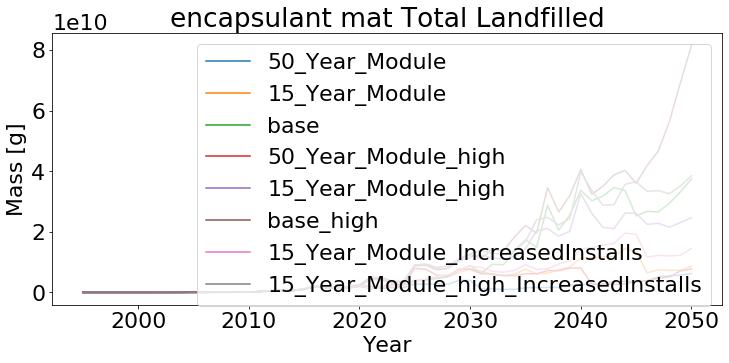

In [24]:
r1.plotMaterialComparisonAcrossScenarios(material='encapsulant', keyword='mat_Total_Landfilled')


## Same plots but not automatic from the software to control more the parameters

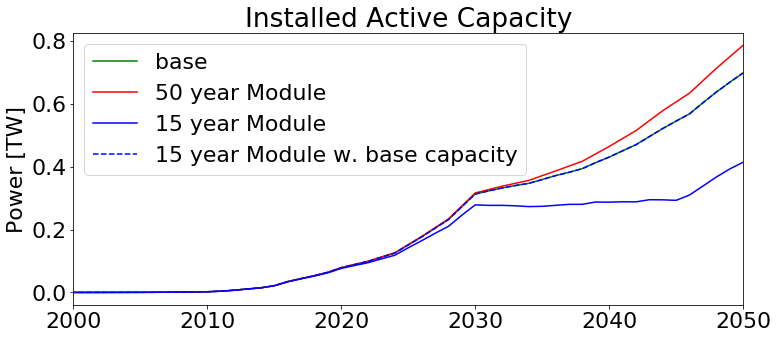

In [25]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].data['Installed_Capacity_[W]']/1e12, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].data['Installed_Capacity_[W]']/1e12, 'r', label='50 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].data['Installed_Capacity_[W]']/1e12, 'b', label='15 year Module')
#plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].data['Installed_Capacity_[W]']/1e12, 'r--', label='50 year Module w base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].data['Installed_Capacity_[W]']/1e12, 'b--', label='15 year Module w. base capacity')

plt.ylabel('Power [TW]')

plt.title('Installed Active Capacity')
plt.xlim([2000, 2050])
plt.legend()

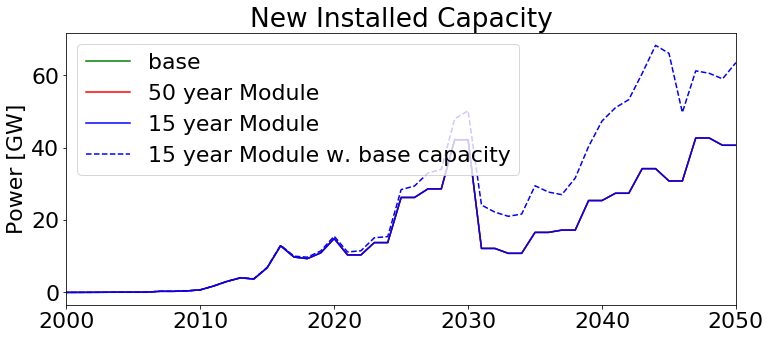

In [26]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].data['new_Installed_Capacity_[MW]']/1e3, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].data['new_Installed_Capacity_[MW]']/1e3, 'r', label='50 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].data['new_Installed_Capacity_[MW]']/1e3, 'b', label='15 year Module')
#plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].data['new_Installed_Capacity_[MW]']/1e3, 'r--', label='50 year Module w base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]']/1e3, 'b--', label='15 year Module w. base capacity')

plt.ylabel('Power [GW]')

plt.title('New Installed Capacity')
plt.xlim([2000, 2050])
plt.legend()

(2000, 2050)

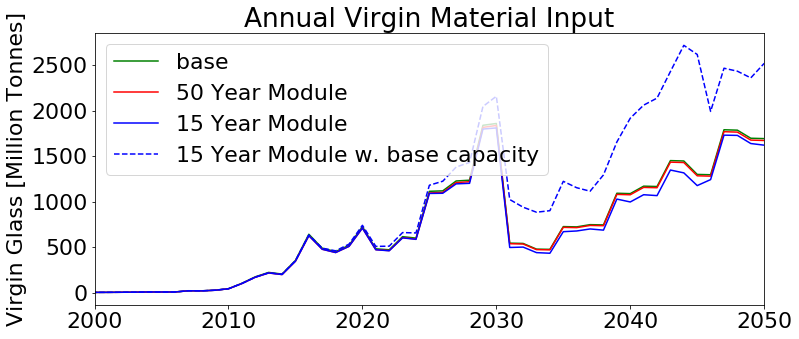

In [27]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'r', label='50 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'b', label='15 Year Module')
#plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'r--', label='50 Year Module w. base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'b--', label='15 Year Module w. base capacity')

plt.ylabel('Virgin Glass [Million Tonnes]')
plt.legend()
plt.title('Annual Virgin Material Input')
plt.xlim([2000, 2050])



(2000, 2050)

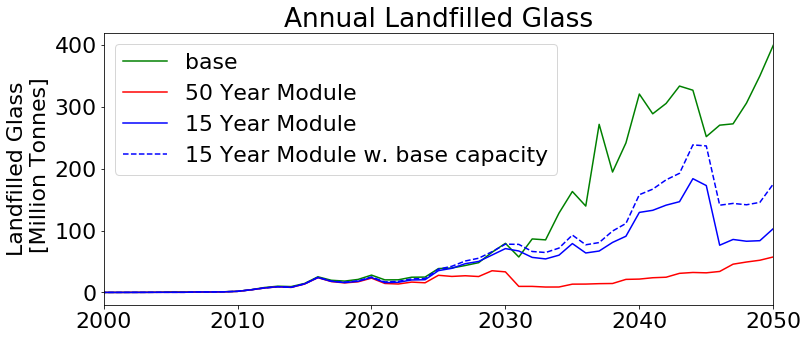

In [28]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'r', label='50 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'b', label='15 Year Module')
#plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'r--', label='50 Year Module w. base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'b--', label='15 Year Module w. base capacity')

plt.ylabel('Landfilled Glass\n [Million Tonnes]')
plt.legend()
plt.title('Annual Landfilled Glass')
plt.xlim([2000, 2050])


# Calculating Overall changes between the Scenarios

In [29]:
cum_Waste = []
cum_VirginNeeds = []
cum_InstalledCapacity = []
cum_NewInstalls = []

for ii in range (0, len(r1.scenario.keys())):
    # Cumulative
    scen = list(r1.scenario.keys())[ii]
    cum_Waste.append(r1.scenario[scen].material['glass'].materialdata['mat_Total_Landfilled'].sum())
    cum_VirginNeeds.append(r1.scenario[scen].material['glass'].materialdata['mat_Virgin_Stock'].sum())
    cum_NewInstalls.append(r1.scenario[scen].data['new_Installed_Capacity_[MW]'].sum())
    cum_InstalledCapacity.append(r1.scenario[scen].data['Installed_Capacity_[W]'].iloc[-1])

df = pd.DataFrame(list(zip(list(r1.scenario.keys()), cum_Waste, cum_VirginNeeds, cum_NewInstalls, cum_InstalledCapacity)),
               columns =['scenarios','cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity'])
df = df.set_index('scenarios')
#df.index
df_high = df.filter(regex='_high', axis=0)
#df_high
#df_ref = df.drop(df.index ='$_high') #####FIX LATER
#df_ref

###  Normalize by Base Scenario

In [30]:
df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']] = df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']]*100/df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']].iloc[2] -100
df.round(2)

,cum_Waste,cum_VirginNeeds,cum_NewInstalls,cum_InstalledCapacity
scenarios,,,,
50_Year_Module,-83.26,-1.39,0.00,12.59
15_Year_Module,-53.73,-4.76,0.00,-40.69
base,0.00,0.00,0.00,0.00
50_Year_Module_high,-69.41,96.85,99.42,122.28
15_Year_Module_high,6.21,88.56,99.42,-10.90
base_high,48.81,99.53,99.42,104.04
15_Year_Module_IncreasedInstalls,-39.86,41.38,48.44,0.01
15_Year_Module_high_IncreasedInstalls,32.71,203.78,220.09,104.08


In [31]:
df_high[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']] = df_high[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']]*100/df_high[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']].iloc[2] -100
df_high.round(2)

C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,cum_Waste,cum_VirginNeeds,cum_NewInstalls,cum_InstalledCapacity
scenarios,,,,
50_Year_Module_high,-79.44,-1.34,-0.00,8.94
15_Year_Module_high,-28.63,-5.50,-0.00,-56.33
base_high,0.00,0.00,-0.00,0.00
15_Year_Module_high_IncreasedInstalls,-10.82,52.25,60.52,0.02


### Cumulative results by material

In [32]:
USyearly=pd.DataFrame()

keyword = 'mat_Total_Landfilled'

# Loop over Scenarios
for jj in range (0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    for ii in range (0, len(MATERIALS)):    
        material = MATERIALS[ii]
        foo = r1.scenario[case].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_Total_"+material+'_'+r1.name+'_'+case] = foo[material]

    filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(r1.name+'_'+case)) ]
    USyearly['Waste_Total_Module_'+r1.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)

,Waste_Total_glass_Simulation1_50_Year_Module,Waste_Total_aluminium_frames_Simulation1_50_Year_Module,Waste_Total_silver_Simulation1_50_Year_Module,Waste_Total_silicon_Simulation1_50_Year_Module,Waste_Total_copper_Simulation1_50_Year_Module,Waste_Total_encapsulant_Simulation1_50_Year_Module,Waste_Total_Module_Simulation1_50_Year_Module,Waste_Total_glass_Simulation1_15_Year_Module,Waste_Total_aluminium_frames_Simulation1_15_Year_Module,Waste_Total_silver_Simulation1_15_Year_Module,...,Waste_Total_copper_Simulation1_15_Year_Module_IncreasedInstalls,Waste_Total_encapsulant_Simulation1_15_Year_Module_IncreasedInstalls,Waste_Total_Module_Simulation1_15_Year_Module_IncreasedInstalls,Waste_Total_glass_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_Total_aluminium_frames_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_Total_silver_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_Total_silicon_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_Total_copper_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_Total_encapsulant_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_Total_Module_Simulation1_15_Year_Module_high_IncreasedInstalls
0,3.557465e+07,3.797870e+06,1.903224e+05,7.064407e+07,2848.182857,2.598516e+06,1.128083e+08,3.557465e+07,3.797870e+06,1.903224e+05,...,2848.182857,2.598516e+06,1.128083e+08,3.557465e+07,3.797870e+06,1.903224e+05,7.064407e+07,2848.182857,2.598516e+06,1.128083e+08
1,2.708062e+07,2.822073e+06,1.392352e+05,5.272220e+07,2168.132478,1.978078e+06,8.474437e+07,2.708062e+07,2.822075e+06,1.392352e+05,...,2168.127015,1.978070e+06,8.474402e+07,2.708051e+07,2.822063e+06,1.392346e+05,5.272197e+07,2168.127015,1.978070e+06,8.474402e+07
2,3.210005e+07,2.993255e+06,1.583517e+05,6.124443e+07,2569.998539,2.344717e+06,9.884337e+07,3.210028e+07,2.993346e+06,1.583543e+05,...,2593.456548,2.365999e+06,9.973988e+07,3.239130e+07,3.020483e+06,1.597899e+05,6.179971e+07,2593.456548,2.365999e+06,9.973988e+07
3,3.209073e+07,2.815473e+06,1.516168e+05,5.997714e+07,2569.252871,2.344036e+06,9.738157e+07,3.209296e+07,2.816332e+06,1.516412e+05,...,2610.163000,2.380230e+06,9.887900e+07,3.258524e+07,2.859522e+06,1.539670e+05,6.089744e+07,2610.163000,2.380230e+06,9.887900e+07
4,4.536753e+07,3.893080e+06,2.048883e+05,8.302481e+07,3632.222111,3.313827e+06,1.358078e+08,4.537893e+07,3.897457e+06,2.050128e+05,...,3696.224756,3.366438e+06,1.379328e+08,4.608268e+07,3.957849e+06,2.081911e+05,8.431392e+07,3696.224756,3.366438e+06,1.379328e+08
5,5.547384e+07,4.663118e+06,1.529391e+05,9.935985e+07,4441.355375,4.052032e+06,1.637062e+08,5.551518e+07,4.678921e+06,1.533889e+05,...,4537.528813,4.118789e+06,1.662929e+08,5.636924e+07,4.750718e+06,1.557436e+05,1.008939e+08,4537.528813,4.118789e+06,1.662929e+08
6,7.320270e+07,6.036027e+06,1.920516e+05,1.282639e+08,5860.769716,5.347020e+06,2.130476e+08,7.332302e+07,6.081720e+06,1.933543e+05,...,6023.225706,5.434134e+06,2.162040e+08,7.434140e+07,6.165719e+06,1.960269e+05,1.300607e+08,6023.225706,5.434134e+06,2.162040e+08
7,1.101184e+08,8.917778e+06,2.742123e+05,1.886589e+08,8816.332112,8.043493e+06,3.160216e+08,1.104186e+08,9.030924e+06,2.774439e+05,...,9106.849787,8.156038e+06,3.196752e+08,1.115246e+08,9.120603e+06,2.802013e+05,1.905846e+08,9106.849787,8.156038e+06,3.196752e+08
8,1.535207e+08,1.228953e+07,3.618114e+05,2.570396e+08,12291.244810,1.121377e+07,4.344377e+08,1.541888e+08,1.253933e+07,3.689529e+05,...,12834.023252,1.136933e+07,4.387896e+08,1.553506e+08,1.263267e+07,3.717011e+05,2.590525e+08,12834.023252,1.136933e+07,4.387896e+08
9,2.413441e+08,1.880422e+07,5.365952e+05,4.046293e+08,19322.656065,1.762875e+07,6.829622e+08,2.427054e+08,1.930877e+07,5.510120e+05,...,20345.407656,1.786934e+07,6.888638e+08,2.440267e+08,1.941263e+07,5.539767e+05,4.069808e+08,20345.407656,1.786934e+07,6.888638e+08


In [33]:
scen = list(r1.scenario.keys())
print(keyword)

mat_Total_Landfilled


In [34]:
keyword = 'mat_Total_EOL_Landfilled'

# Loop over Scenarios
for jj in range (0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    for ii in range (0, len(MATERIALS)):    
        material = MATERIALS[ii]
        foo = r1.scenario[case].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_EoL_"+material+'_'+r1.name+'_'+case] = foo[material]

    filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(r1.name+'_'+case)) ]
    USyearly['Waste_EoL_Module_'+r1.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)

,Waste_Total_glass_Simulation1_50_Year_Module,Waste_Total_aluminium_frames_Simulation1_50_Year_Module,Waste_Total_silver_Simulation1_50_Year_Module,Waste_Total_silicon_Simulation1_50_Year_Module,Waste_Total_copper_Simulation1_50_Year_Module,Waste_Total_encapsulant_Simulation1_50_Year_Module,Waste_Total_Module_Simulation1_50_Year_Module,Waste_Total_glass_Simulation1_15_Year_Module,Waste_Total_aluminium_frames_Simulation1_15_Year_Module,Waste_Total_silver_Simulation1_15_Year_Module,...,Waste_EoL_copper_Simulation1_15_Year_Module_IncreasedInstalls,Waste_EoL_encapsulant_Simulation1_15_Year_Module_IncreasedInstalls,Waste_EoL_Module_Simulation1_15_Year_Module_IncreasedInstalls,Waste_EoL_glass_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_EoL_aluminium_frames_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_EoL_silver_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_EoL_silicon_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_EoL_copper_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_EoL_encapsulant_Simulation1_15_Year_Module_high_IncreasedInstalls,Waste_EoL_Module_Simulation1_15_Year_Module_high_IncreasedInstalls
0,3.557465e+07,3.797870e+06,1.903224e+05,7.064407e+07,2848.182857,2.598516e+06,1.128083e+08,3.557465e+07,3.797870e+06,1.903224e+05,...,0.000000,0.000000e+00,2.256166e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.256166e+08
1,2.708062e+07,2.822073e+06,1.392352e+05,5.272220e+07,2168.132478,1.978078e+06,8.474437e+07,2.708062e+07,2.822075e+06,1.392352e+05,...,0.003729,5.867616e-01,1.694880e+08,5.548573e+00,2.143958e+00,6.103430e-02,5.884410e-01,0.003729,5.867616e-01,1.694880e+08
2,3.210005e+07,2.993255e+06,1.583517e+05,6.124443e+07,2569.998539,2.344717e+06,9.884337e+07,3.210028e+07,2.993346e+06,1.583543e+05,...,0.158126,2.488361e+01,1.994801e+08,2.353060e+02,9.088287e+01,2.586556e+00,2.494605e+01,0.158126,2.488361e+01,1.994801e+08
3,3.209073e+07,2.815473e+06,1.516168e+05,5.997714e+07,2569.252871,2.344036e+06,9.738157e+07,3.209296e+07,2.816332e+06,1.516412e+05,...,1.497314,2.356264e+02,1.977616e+08,2.228146e+03,8.590824e+02,2.442989e+01,2.359140e+02,1.497314,2.356264e+02,1.977616e+08
4,4.536753e+07,3.893080e+06,2.048883e+05,8.302481e+07,3632.222111,3.313827e+06,1.358078e+08,4.537893e+07,3.897457e+06,2.050128e+05,...,7.658757,1.205229e+03,2.758839e+08,1.139696e+04,4.378756e+03,1.245118e+02,1.204531e+03,7.658757,1.205229e+03,2.758839e+08
5,5.547384e+07,4.663118e+06,1.529391e+05,9.935985e+07,4441.355375,4.052032e+06,1.637062e+08,5.551518e+07,4.678921e+06,1.533889e+05,...,27.798711,4.374574e+03,3.326522e+08,4.136713e+04,1.581037e+04,4.500168e+02,4.362730e+03,27.798711,4.374574e+03,3.326522e+08
6,7.320270e+07,6.036027e+06,1.920516e+05,1.282639e+08,5860.769716,5.347020e+06,2.130476e+08,7.332302e+07,6.081720e+06,1.933543e+05,...,80.936984,1.273674e+04,4.326011e+08,1.204419e+05,4.573326e+04,1.303954e+03,1.267188e+04,80.936984,1.273674e+04,4.326011e+08
7,1.101184e+08,8.917778e+06,2.742123e+05,1.886589e+08,8816.332112,8.043493e+06,3.160216e+08,1.104186e+08,9.030924e+06,2.774439e+05,...,202.020371,3.179115e+04,6.398310e+08,3.006256e+05,1.133015e+05,3.236261e+03,3.154532e+04,202.020371,3.179115e+04,6.398310e+08
8,1.535207e+08,1.228953e+07,3.618114e+05,2.570396e+08,12291.244810,1.121377e+07,4.344377e+08,1.541888e+08,1.253933e+07,3.689529e+05,...,449.929477,7.080363e+04,8.786475e+08,6.695379e+05,2.502781e+05,7.155795e+03,7.004910e+04,449.929477,7.080363e+04,8.786475e+08
9,2.413441e+08,1.880422e+07,5.365952e+05,4.046293e+08,19322.656065,1.762875e+07,6.829622e+08,2.427054e+08,1.930877e+07,5.510120e+05,...,917.404902,1.443684e+05,1.379901e+09,1.365186e+06,5.058293e+05,1.445425e+04,1.423599e+05,917.404902,1.443684e+05,1.379901e+09


In [35]:
keyword='mat_Virgin_Stock'
# Loop over Scenarios
for jj in range (0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    for ii in range (0, len(MATERIALS)):    
        material = MATERIALS[ii]
        foo = r1.scenario[case].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["VirginStock_"+material+'_'+case] = foo[material]

    filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(r1.name+'_'+case)) ]
    USyearly['VirginStock_Module_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)

,Waste_Total_glass_Simulation1_50_Year_Module,Waste_Total_aluminium_frames_Simulation1_50_Year_Module,Waste_Total_silver_Simulation1_50_Year_Module,Waste_Total_silicon_Simulation1_50_Year_Module,Waste_Total_copper_Simulation1_50_Year_Module,Waste_Total_encapsulant_Simulation1_50_Year_Module,Waste_Total_Module_Simulation1_50_Year_Module,Waste_Total_glass_Simulation1_15_Year_Module,Waste_Total_aluminium_frames_Simulation1_15_Year_Module,Waste_Total_silver_Simulation1_15_Year_Module,...,VirginStock_copper_15_Year_Module_IncreasedInstalls,VirginStock_encapsulant_15_Year_Module_IncreasedInstalls,VirginStock_Module_15_Year_Module_IncreasedInstalls,VirginStock_glass_15_Year_Module_high_IncreasedInstalls,VirginStock_aluminium_frames_15_Year_Module_high_IncreasedInstalls,VirginStock_silver_15_Year_Module_high_IncreasedInstalls,VirginStock_silicon_15_Year_Module_high_IncreasedInstalls,VirginStock_copper_15_Year_Module_high_IncreasedInstalls,VirginStock_encapsulant_15_Year_Module_high_IncreasedInstalls,VirginStock_Module_15_Year_Module_high_IncreasedInstalls
0,3.557465e+07,3.797870e+06,1.903224e+05,7.064407e+07,2848.182857,2.598516e+06,1.128083e+08,3.557465e+07,3.797870e+06,1.903224e+05,...,5.404482e+05,8.719852e+07,4.512331e+08,8.355747e+08,3.129164e+08,8.990322e+06,1.554862e+08,5.404482e+05,8.719852e+07,4.512331e+08
1,2.708062e+07,2.822073e+06,1.392352e+05,5.272220e+07,2168.132478,1.978078e+06,8.474437e+07,2.708062e+07,2.822075e+06,1.392352e+05,...,4.114056e+05,6.637816e+07,3.389761e+08,6.360648e+08,2.325170e+08,6.577068e+06,1.160400e+08,4.114056e+05,6.637816e+07,3.389761e+08
2,3.210005e+07,2.993255e+06,1.583517e+05,6.124443e+07,2569.998539,2.344717e+06,9.884337e+07,3.210028e+07,2.993346e+06,1.583543e+05,...,4.920830e+05,7.939510e+07,3.989603e+08,7.607987e+08,2.488572e+08,7.547919e+06,1.360199e+08,4.920830e+05,7.939510e+07,3.989603e+08
3,3.209073e+07,2.815473e+06,1.516168e+05,5.997714e+07,2569.252871,2.344036e+06,9.738157e+07,3.209296e+07,2.816332e+06,1.516412e+05,...,4.949957e+05,7.986558e+07,3.955232e+08,7.653056e+08,2.355250e+08,7.271787e+06,1.340335e+08,4.949957e+05,7.986558e+07,3.955232e+08
4,4.536753e+07,3.893080e+06,2.048883e+05,8.302481e+07,3632.222111,3.313827e+06,1.358078e+08,4.537893e+07,3.897457e+06,2.050128e+05,...,6.998939e+05,1.129273e+08,5.517677e+08,1.082111e+09,3.256973e+08,9.828262e+06,1.855706e+08,6.998939e+05,1.129273e+08,5.517677e+08
5,5.547384e+07,4.663118e+06,1.529391e+05,9.935985e+07,4441.355375,4.052032e+06,1.637062e+08,5.551518e+07,4.678921e+06,1.533889e+05,...,8.556631e+05,1.380676e+08,6.653044e+08,1.322995e+09,3.899791e+08,7.334768e+06,2.220559e+08,8.556631e+05,1.380676e+08,6.653044e+08
6,7.320270e+07,6.036027e+06,1.920516e+05,1.282639e+08,5860.769716,5.347020e+06,2.130476e+08,7.332302e+07,6.081720e+06,1.933543e+05,...,1.127363e+06,1.819261e+08,8.652021e+08,1.743209e+09,5.038300e+08,9.195621e+06,2.862333e+08,1.127363e+06,1.819261e+08,8.652021e+08
7,1.101184e+08,8.917778e+06,2.742123e+05,1.886589e+08,8816.332112,8.043493e+06,3.160216e+08,1.104186e+08,9.030924e+06,2.774439e+05,...,1.689184e+06,2.726257e+08,1.279662e+09,2.612204e+09,7.411154e+08,1.307671e+07,4.194036e+08,1.689184e+06,2.726257e+08,1.279662e+09
8,1.535207e+08,1.228953e+07,3.618114e+05,2.570396e+08,12291.244810,1.121377e+07,4.344377e+08,1.541888e+08,1.253933e+07,3.689529e+05,...,2.348765e+06,3.791451e+08,1.757295e+09,3.632654e+09,1.017965e+09,1.720604e+07,5.700153e+08,2.348765e+06,3.791451e+08,1.757295e+09
9,2.413441e+08,1.880422e+07,5.365952e+05,4.046293e+08,19322.656065,1.762875e+07,6.829622e+08,2.427054e+08,1.930877e+07,5.510120e+05,...,3.684220e+06,5.947978e+08,2.759801e+09,5.698632e+09,1.553228e+09,2.545711e+07,8.834351e+08,3.684220e+06,5.947978e+08,2.759801e+09


In [36]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons

In [37]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

,Waste_Total_glass_Simulation1_50_Year_Module,Waste_Total_aluminium_frames_Simulation1_50_Year_Module,Waste_Total_silver_Simulation1_50_Year_Module,Waste_Total_silicon_Simulation1_50_Year_Module,Waste_Total_copper_Simulation1_50_Year_Module,Waste_Total_encapsulant_Simulation1_50_Year_Module,Waste_Total_Module_Simulation1_50_Year_Module,Waste_Total_glass_Simulation1_15_Year_Module,Waste_Total_aluminium_frames_Simulation1_15_Year_Module,Waste_Total_silver_Simulation1_15_Year_Module,...,VirginStock_copper_15_Year_Module_IncreasedInstalls,VirginStock_encapsulant_15_Year_Module_IncreasedInstalls,VirginStock_Module_15_Year_Module_IncreasedInstalls,VirginStock_glass_15_Year_Module_high_IncreasedInstalls,VirginStock_aluminium_frames_15_Year_Module_high_IncreasedInstalls,VirginStock_silver_15_Year_Module_high_IncreasedInstalls,VirginStock_silicon_15_Year_Module_high_IncreasedInstalls,VirginStock_copper_15_Year_Module_high_IncreasedInstalls,VirginStock_encapsulant_15_Year_Module_high_IncreasedInstalls,VirginStock_Module_15_Year_Module_high_IncreasedInstalls
0,35.574651,3.797870,0.190322,70.644070,0.002848,2.598516,112.808277,35.574651,3.797870,0.190322,...,0.540448,87.198516,451.233107,835.574651,312.916411,8.990322,155.486213,0.540448,87.198516,451.233107
1,62.655270,6.619942,0.329558,123.366265,0.005016,4.576593,197.552645,62.655276,6.619944,0.329558,...,0.951854,153.576674,790.209198,1471.639446,545.433363,15.567391,271.526239,0.951854,153.576674,790.209198
2,94.755316,9.613198,0.487909,184.610699,0.007586,6.921310,296.396019,94.755557,9.613291,0.487912,...,1.443937,232.971778,1189.169463,2232.438191,794.290585,23.115310,407.546129,1.443937,232.971778,1189.169463
3,126.846049,12.428671,0.639526,244.587839,0.010156,9.265346,393.777586,126.848518,12.429623,0.639553,...,1.938932,312.837358,1584.692650,2997.743812,1029.815588,30.387097,541.579674,1.938932,312.837358,1584.692650
4,172.213581,16.321750,0.844414,327.612651,0.013788,12.579173,529.585358,172.227444,16.327080,0.844566,...,2.638826,425.764616,2136.460398,4079.854417,1355.512919,40.215359,727.150310,2.638826,425.764616,2136.460398


In [38]:
keyword='Installed_Capacity_[W]'
# Loop over Scenarios
for jj in range(0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    foo = r1.scenario[case].data[keyword]
    foo = foo.to_frame(name=keyword)
    UScum["Capacity_"+'_'+case] = foo[keyword]

In [39]:
USyearly.index = r1.scenario['base'].data['year']
UScum.index = r1.scenario['base'].data['year']

In [40]:
UScum.to_csv('Cole2021_Cumulative_Results.csv')
USyearly.to_csv('Cole2021_Yearly_Results.csv')

In [41]:
UScum.head(10)

,Waste_Total_glass_Simulation1_50_Year_Module,Waste_Total_aluminium_frames_Simulation1_50_Year_Module,Waste_Total_silver_Simulation1_50_Year_Module,Waste_Total_silicon_Simulation1_50_Year_Module,Waste_Total_copper_Simulation1_50_Year_Module,Waste_Total_encapsulant_Simulation1_50_Year_Module,Waste_Total_Module_Simulation1_50_Year_Module,Waste_Total_glass_Simulation1_15_Year_Module,Waste_Total_aluminium_frames_Simulation1_15_Year_Module,Waste_Total_silver_Simulation1_15_Year_Module,...,VirginStock_encapsulant_15_Year_Module_high_IncreasedInstalls,VirginStock_Module_15_Year_Module_high_IncreasedInstalls,Capacity__50_Year_Module,Capacity__15_Year_Module,Capacity__base,Capacity__50_Year_Module_high,Capacity__15_Year_Module_high,Capacity__base_high,Capacity__15_Year_Module_IncreasedInstalls,Capacity__15_Year_Module_high_IncreasedInstalls
year,,,,,,,,,,,,,,,,,,,,,
1995,35.574651,3.797870,0.190322,70.644070,0.002848,2.598516,112.808277,35.574651,3.797870,0.190322,...,87.198516,451.233107,1.260000e+07,1.260000e+07,1.260000e+07,1.260000e+07,1.260000e+07,1.260000e+07,1.260000e+07,1.260000e+07
1996,62.655270,6.619942,0.329558,123.366265,0.005016,4.576593,197.552645,62.655276,6.619944,0.329558,...,153.576674,790.209198,2.224379e+07,2.224379e+07,2.224375e+07,2.224379e+07,2.224379e+07,2.224375e+07,2.224375e+07,2.224375e+07
1997,94.755316,9.613198,0.487909,184.610699,0.007586,6.921310,296.396019,94.755557,9.613291,0.487912,...,232.971778,1189.169463,3.381115e+07,3.370486e+07,3.381019e+07,3.381115e+07,3.370486e+07,3.381019e+07,3.381101e+07,3.381101e+07
1998,126.846049,12.428671,0.639526,244.587839,0.010156,9.265346,393.777586,126.848518,12.429623,0.639553,...,312.837358,1584.692650,4.547058e+07,4.517760e+07,4.546365e+07,4.547058e+07,4.517760e+07,4.546365e+07,4.546503e+07,4.546503e+07
1999,172.213581,16.321750,0.844414,327.612651,0.013788,12.579173,529.585358,172.227444,16.327080,0.844566,...,425.764616,2136.460398,6.220777e+07,6.163158e+07,6.217808e+07,6.220777e+07,6.163158e+07,6.217808e+07,6.218005e+07,6.218005e+07
2000,227.687417,20.984868,0.997353,426.972497,0.018229,16.631206,693.291571,227.742626,21.006002,0.997955,...,563.832216,2801.764811,8.291427e+07,8.195583e+07,8.282051e+07,8.291427e+07,8.195583e+07,8.282051e+07,8.282291e+07,8.282291e+07
2001,300.890117,27.020895,1.189405,555.236401,0.024090,21.978226,906.339134,301.065648,27.087721,1.191309,...,745.758301,3666.966933,1.106090e+08,1.091207e+08,1.103670e+08,1.106090e+08,1.091207e+08,1.103670e+08,1.103699e+08,1.103699e+08
2002,411.008523,35.938673,1.463617,743.895338,0.032906,30.021719,1222.360777,411.484213,36.118645,1.468753,...,1018.384023,4946.628964,1.527250e+08,1.505237e+08,1.521844e+08,1.527250e+08,1.505237e+08,1.521844e+08,1.521875e+08,1.521875e+08
2003,564.529214,48.228205,1.825429,1000.934940,0.045197,41.235491,1656.798475,565.672973,48.657972,1.837706,...,1397.529131,6703.923899,2.119630e+08,2.087858e+08,2.108806e+08,2.119630e+08,2.087858e+08,2.108806e+08,2.108839e+08,2.108839e+08


## Make a pie chart of Cumulative Material for base case

In [47]:
  
UScum.plot.pie(y=UScum[filter_col].loc[[2050]])

ValueError: Must pass DataFrame with boolean values only

In [46]:
#selecting down for fancy plotting
# want 2050 lifecycle wastes
filter_col = [col for col in UScum if (col.startswith('Waste_Total_Module')) ]
UScum[filter_col].loc[[2050]].to_csv(os.path.join(testfolder,'Cum_Waste_2050only.csv'))